## Autocorrelation and Cross-Correlation

Autocorrelation and cross-correlation can produce plots that are sometimes hard to interpret. By working with an understandable data set we can acquire intuition about these important methods for viewing time series.

In [1]:
# Data and plotting
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
# Read the data into a dictionary with one dataframe per year.
 
path  = '/Users/Pan/Google Drive/Data Science/DS6001/BabyNames/'

files = [file for file in os.listdir(path)
        if file.startswith('yob')]
years = np.array(sorted([int(file[3:7])
                for file in files]))
baby_names = {year: pd.read_csv(path + 'yob{y:d}.txt'.format(y= year),
#baby_names = {year: pd.read_csv('/Users/donaldbrown/Dropbox/department/Classes/Data/BabyNames/yob{y:d}.txt'.format(y= year),
                         index_col = 0, header = None,
                         names = ['First name', 'Gender', 'Number']) for year in years}
baby_names[2012].head()

,Gender,Number
First name,,
Sophia,F,22245
Emma,F,20871
Isabella,F,19026
Olivia,F,17253
Ava,F,15494


In [4]:
# Most popular names in a year
# the names are ordered by fequency in the files

baby_names[1995]['Number'][baby_names[1995]["Gender"] == 'F'].head()

First name
Jessica     27937
Ashley      26603
Emily       24379
Samantha    21646
Sarah       21358
Name: Number, dtype: int64

In [5]:
# Functions to get baby names as functions of gender and birth year

def get_value(name, gender, year):
    """Returns the number of babies born in a given year
    with the specified name and gender"""
    try:
        return baby_names[year] \
               [baby_names[year]['Gender'] == gender] \
               ['Number'][name]
    except KeyError:
        return 0 

In [6]:
# number of children with the selected name and  year

Year = 2012
Name = 'Catherine'

name_number = get_value(Name, 'F', 2012)

print(str(name_number) + ' babies named ' + str(Name) + ' were born in ' + str(Year))



1898 babies named Catherine were born in 2012


In [7]:
# Function that gets the baby names over the years

def get_series(name, gender):
    """Return the series of the baby name over time"""
    return np.array([get_value(name, gender, year) for year in years])

In [8]:
# Autocorrelation function

def autocorr(x):
    """Return the correlation of a time series with itself
    at different lags"""
    correlation = np.correlate(x,x, mode = 'full')
    norm_corr = correlation[int(correlation.size/2):]/max(correlation[int(correlation.size/2):])
    return norm_corr

In [10]:
# Plot of  the time series and autocorrelation
# of baby names

def autocorr_names(names):
    fig, (ts_plot, ac_plot) = plt.subplots(1,2,figsize = (14,10))
    for i in names.keys():
        x = get_series(i, names[i])    
        z = autocorr(x)
        ts_plot.plot(years, x, '-o', label = i)
        ts_plot.set_title("Baby Names") 
        ts_plot.legend(loc = 'best')
        ts_plot.set_xlabel("Years")
        ts_plot.set_ylabel("Number")
        #Autocorrelation
        ac_plot.plot(z, '-', label = i)
        ac_plot.legend(loc = 'best')
        ac_plot.set_xlabel("Lags")
        ac_plot.set_title('Autocorrelation')
        ac_plot.set_ylabel("Correlation")

## In-Class Exercise 1

Use autocorr_names for several boy names and girl names and then explain the resulting plots

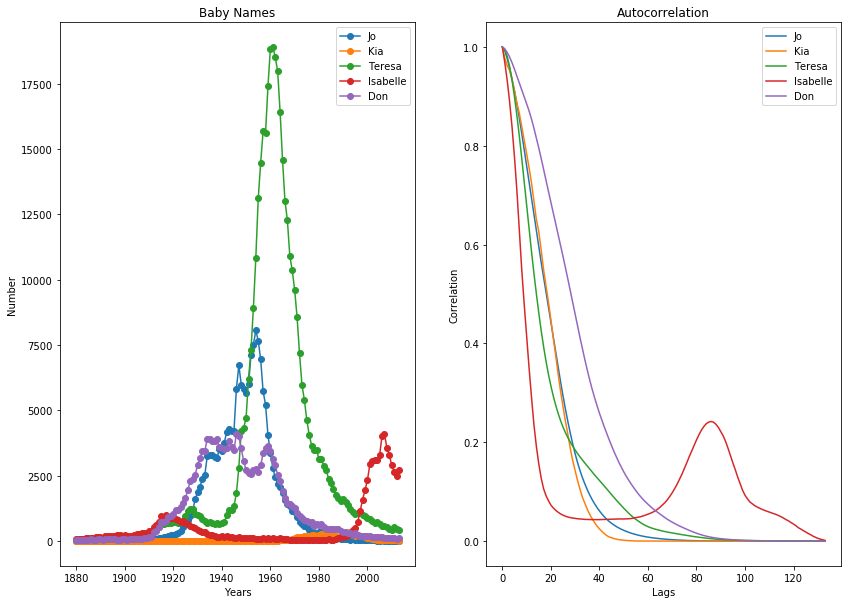

In [13]:
names={'Jo':'F',"Kia":"F","Teresa":"F","Isabelle":"F","Don":"M"}
autocorr_names(names)

## In Class Exercise 2

Use crosscorr_names for several boy and girl names and then explain the resulting plots